# Exploration of the validation results

# 0. Import dependencies and inputs

In [122]:
%run ../notebook_preamble.ipy

# First batch of transitions
val_trans = pd.read_csv(data_folder + 'processed/validation/Transitions_to_validate_BATCH_1.csv')

# Validations results of the first batch
path_to_val_data = data_folder + 'restricted/validation/nesta_output_16Dec.csv'
val_data = pd.read_csv(path_to_val_data)

# Similarity matrices
sims = load_data.Similarities()


In [123]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38334 entries, 0 to 38333
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   classification_id                 38334 non-null  int64 
 1   subject_ids                       38334 non-null  int64 
 2   origin_id                         38334 non-null  int64 
 3   origin_label                      38334 non-null  object
 4   origin_description                38334 non-null  object
 5   destination_id                    38334 non-null  int64 
 6   destination_label                 38334 non-null  object
 7   destination_description           38334 non-null  object
 8   perfectly_matched_skills          33496 non-null  object
 9   partially_matched_skills          33288 non-null  object
 10  unmatched_skills                  38076 non-null  object
 11  familiarity_with_origin_1-5       38334 non-null  int64 
 12  familiarity_with_d

# 1. Check the dataset

In [124]:
val_data

,classification_id,subject_ids,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,...,familiarity_with_destination_1-5,feasibility_1-5,Reasons,coder_id,questionable_respondant_flag,year_of_birth,gender,background,highest_qualification,nation
0,289643147,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,3,**Qualifications** - different qualification r...,566802cf6d9c32c4b9d6,False,1994,Male,"['Education','Healthcare']",Master'degree,England
1,289715915,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,3,3,"**Skills** - poor skills overlap, missing esse...",dfaa44417fdef5173766,False,1967,Female,"['Healthcare', 'Sales and services']",Bachelor's degree,Scotland
2,289776880,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,1,2,"**Skills** - poor skills overlap, missing esse...",b929c3beb0e7ffb1ea4a,False,1984,Male,"['Education','Engineering and research']",Doctorate,England
3,289806895,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,4,1,**Qualifications** - different qualification r...,20df3373ab16becb8f2e,False,1987,Male,['Sales and services'],GCSE,Wales
4,290219173,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,2,**Qualifications** - different qualification r...,ef345455b53500fbb303,False,1986,Female,"['Business and administration', 'Public sector...",Bachelor's degree,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38329,293182077,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,1,3,"**Skills** - poor skills overlap, missing esse...",e7d2af6fff62ee521731,False,1982,Male,"['Healthcare','Public sector and government']",GCSE,England
38330,293342205,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,3,3,**Qualifications** - different qualification r...,301972f25ee678d52c40,True,1994,Male,['Sales and services'],Master's degree,England
38331,293370399,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,2,2,**Qualifications** - different qualification r...,4cfe20b09a5e8abe052a,True,1987,Male,['Arts and media'],Higher National Diploma,Northern Ireland
38332,293371675,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,5,

In [126]:
for x in val_data.Reasons.unique(): print(x)

**Qualifications** - different qualification required
**Skills** - poor skills overlap, missing essential skills, retraining would take too long
**Conditions** - compensation of destination job too low, perceived lower quality of work in destination job
**Other** - all other reasons
**Personal** - big change in working hours, working away from home, undesirable transition
**Responsibility** - large change in seniority
**Job market** - industry of destination job in decline, destination job is too competitive


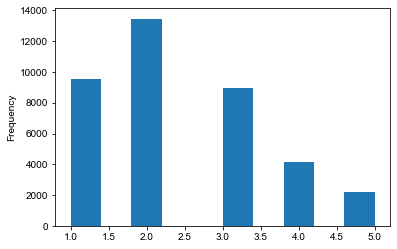

In [127]:
val_data['feasibility_1-5'].plot.hist()
plt.show()

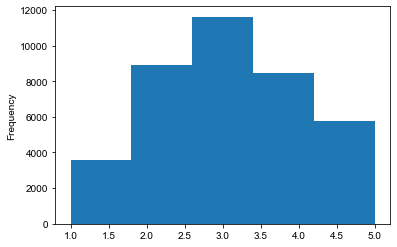

In [128]:
val_data['familiarity_with_origin_1-5'].plot.hist(bins=5)
plt.show()

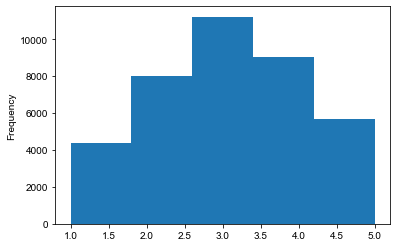

In [129]:
val_data['familiarity_with_destination_1-5'].plot.hist(bins=5)
plt.show()

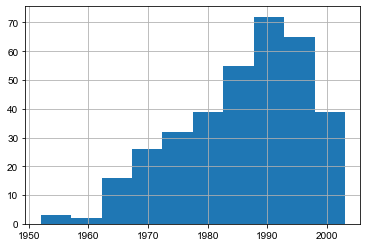

In [130]:
val_data.drop_duplicates('coder_id').year_of_birth.hist()
plt.show()

In [131]:
# Number of unique coders
len(val_data.coder_id.unique())

349

In [132]:
coder_df = val_data.drop_duplicates('coder_id')
coder_df.groupby('gender').agg({'coder_id': 'count'})

,coder_id
gender,
Female,139
Male,208
Prefer not to say,1
Prefer to self-describe,1


In [133]:
coder_df = val_data.drop_duplicates('coder_id')
coder_df.groupby('highest_qualification').agg({'coder_id': 'count'})

,coder_id
highest_qualification,
A-Level,53
Bachelor'degree,10
Bachelor's degree,131
Doctorate,9
GCSE,27
Higher National Certificate,19
Higher National Diploma,23
Master'degree,8
Master's degree,69


In [134]:
coder_df = val_data.drop_duplicates('coder_id')
coder_df.groupby('questionable_respondant_flag').agg({'coder_id': 'count'})

,coder_id
questionable_respondant_flag,
False,344
True,5


In [135]:
coder_df = val_data.drop_duplicates('coder_id')
coder_df.groupby('nation').agg({'coder_id': 'count'})

,coder_id
nation,
England,301
Northern Ireland,3
Scotland,28
Wales,17


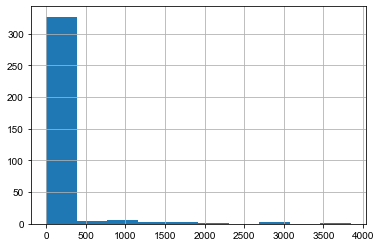

In [137]:
# Number of assessments by a coder
coder_counts = val_data.groupby('coder_id').agg({'classification_id': 'count'})
coder_counts.classification_id.hist()

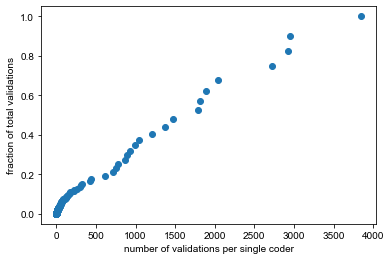

In [158]:
# We should be aware of outsized influence of 'super-users'
# i.e. 50% of the total number of validations are provided by about 10 people 
x = np.sort(coder_counts.classification_id.to_list())
y = np.cumsum(np.sort(coder_counts.classification_id.to_list())) / np.sum(x)
plt.scatter(x, y, linewidths=1)
plt.ylabel('fraction of total validations')
plt.xlabel('number of validations per single coder')
plt.show()

# 2. Check the coverage of transitions

In [33]:
print(len(val_trans))
len(val_data.subject_ids.unique())


4813


4813

In [ ]:
# Check if any transitions are missing
df = val_trans.merge(val_data[['origin_id', 'destination_id', 'subject_ids']], on=['origin_id', 'destination_id'])
df[df.subject_ids.isnull()]

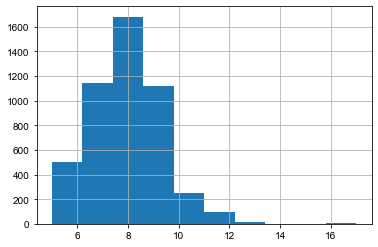

In [38]:
# There are at least 5 ratings for each transition
val_data.groupby('subject_ids').count().classification_id.hist()

# 3. Check the correlation with similarity measures

In [75]:
from scipy.stats import pearsonr

In [160]:
# Check the mean feasibility for each transition
val_data_sim = val_data.groupby('subject_ids').agg({'feasibility_1-5': 'mean'}).reset_index()

# Add occupation IDs 
val_data_sim = val_data_sim.merge(val_data.drop_duplicates('subject_ids')[[
    'origin_id', 'destination_id',
    'origin_label', 'destination_label',
    'subject_ids']],
                                  on=['subject_ids'], how='left')


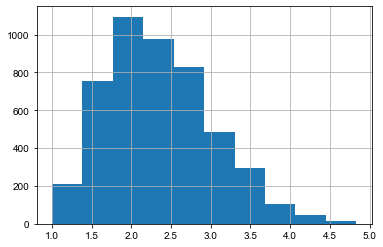

In [161]:
val_data_sim['feasibility_1-5'].hist()
plt.show()

In [162]:
# Add similarity values to the data
val_data_sim['similarity'] = 100
sim_list = []
unique_subjects = val_data_sim.subject_ids.unique()

for j, row in val_data_sim.iterrows():
    sim = sims.W_combined[int(row.origin_id), int(row.destination_id)]
    sim_list.append(sim)
    
val_data_sim['similarity'] = sim_list 

In [163]:
val_data_sim

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity
0,52451278,2.000000,29,2654,legal guardian,employment and vocational integration consultant,0.333975
1,52451279,2.888889,29,1803,legal guardian,special educational needs teacher,0.319810
2,52451280,2.875000,29,1036,legal guardian,social counsellor,0.364106
3,52451281,3.857143,29,2877,legal guardian,social pedagogue,0.352374
4,52451282,2.222222,29,2292,legal guardian,social services manager,0.316622
...,...,...,...,...,...,...,...
4808,53137770,1.222222,2937,2269,demographer,philosopher,0.447875
4809,53137771,1.857143,2937,2046,demographer,anthropologist,0.446530
4810,53137772,2.250000,2937,159,demographer,historian,0.442507
4811,53137773,1.888889,2937,393,demographer,archaeologist,0.422553


In [164]:
len(val_data_sim)

4813

In [165]:
val_data_sim['similarity'].max()

0.9310543004822969

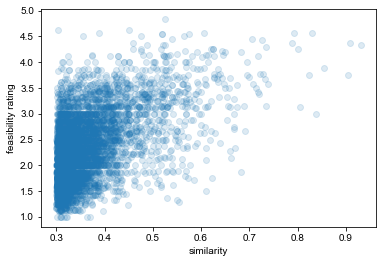

In [166]:
plt.scatter(
    x=val_data_sim['similarity'],
    y=val_data_sim['feasibility_1-5'], alpha=0.15)
plt.xlabel('similarity')
plt.ylabel('feasibility rating')
plt.show()

In [167]:
pearsonr(val_data_sim['similarity'],
         val_data_sim['feasibility_1-5']
        )

(0.5048958847092107, 8.7423649073263e-310)

In [172]:
# Check the least feasible transitions
val_data_sim.sort_values('feasibility_1-5').head(20)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity
1916,52685769,1.000000,1808,401,leather production planner,sport administrator,0.301525
735,52682588,1.000000,625,2107,food analyst,control panel tester,0.307304
597,52682320,1.000000,600,2076,security guard,aviation inspector,0.308610
1550,52684850,1.000000,1510,868,composer,lexicographer,0.319922
1684,52685190,1.000000,1608,1683,user interface developer,architect,0.315793
2621,52690178,1.000000,2638,2880,asset manager,natural resources consultant,0.308654
841,52682848,1.000000,827,517,credit union manager,police commissioner,0.363094
724,52682563,1.000000,625,2076,food analyst,aviation inspector,0.322703
2944,53135906,1.000000,29,2867,legal guardian,recreational therapist,0.370220
84,52451447,1.111111,89,1798,recruitment consultant,lawyer,0.308266
